<a href="https://colab.research.google.com/github/ramonfroes/IBGE/blob/main/SIDRAPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidrapy
import sidrapy                              #API do IBGE
import pandas as pd                         #exploração de dados
import numpy as np                          #exploração de dados
import csv                                  #exploração de dados
import seaborn as sns                       #visualização
import matplotlib.pyplot as plt             #visualização
import graphviz                             #visualização

In [ ]:
br_22 = sidrapy.get_table(table_code='9542',
                         territorial_level="1",
                         ibge_territorial_code="all",
                         variable='950',
                         classifications={'59':'1024,93024','287':'all'})
br_10 = sidrapy.get_table(table_code='1379',
                         territorial_level="1",
                         ibge_territorial_code="all",
                         variable='138',
                          classifications={'59':'1024,93024','287':'all'})
br_00 = sidrapy.get_table(table_code='204',
                         territorial_level="1",
                         ibge_territorial_code="all",
                         variable='157',
                          classifications={'59':'1024,0','58':'all'})

uf_22 = sidrapy.get_table(table_code='9542',
                         territorial_level="3",
                         ibge_territorial_code="all",
                         variable='950',
                         classifications={'59':'1024,93024','287':'all'})
uf_10 = sidrapy.get_table(table_code='1379',
                         territorial_level="3",
                         ibge_territorial_code="all",
                         variable='138',
                          classifications={'59':'1024,93024','287':'all'})
uf_00 = sidrapy.get_table(table_code='204',
                         territorial_level="3",
                         ibge_territorial_code="all",
                         variable='157',
                          classifications={'59':'1024,0','58':'all'})

In [ ]:
# Substitui as colunas pela primeira observação
br_22.columns = br_22.iloc[0]
br_10.columns = br_10.iloc[0]
br_00.columns = br_00.iloc[0]
uf_22.columns = uf_22.iloc[0]
uf_10.columns = uf_10.iloc[0]
uf_00.columns = uf_00.iloc[0]

# fatiando df apenas com informações necessarias
br22 = br_22.iloc[1:, [14,6,5,12,10,4]] #ano,uf,uf(cod),idade,alfabetização,valor
br10= br_10.iloc[1:, [14,6,5,12,10,4]]
br00 = br_00.iloc[1:, [14,6,5,12,10,4]]

d22 = uf_22.iloc[1:, [14,6,5,12,10,4]] #ano,uf,uf(cod),idade,alfabetização,valor
d10 = uf_10.iloc[1:, [14,6,5,12,10,4]]
d00 = uf_00.iloc[1:, [14,6,5,12,10,4]]

br00.rename(columns={'Grupo de idade': 'Idade'}, inplace=True)
d00.rename(columns={'Grupo de idade': 'Idade'}, inplace=True)

In [ ]:
d22 = d22.pivot_table(values='Valor', index=['Alfabetização'], columns=['Unidade da Federação','Idade'], aggfunc='sum')
d22 = d22.apply(pd.to_numeric)
d22

Unidade da Federação         Acre                                          \
Idade                15 a 19 anos 15 anos 16 anos 17 anos 18 anos 19 anos   
Alfabetização                                                               
Não alfabetizadas            1878     421     368     360     358     371   
Total                       78689   15894   15868   15804   15678   15445   

Unidade da Federação                                       ... Tocantins  \
Idade                20 a 24 anos 20 anos 21 anos 22 anos  ...   59 anos   
Alfabetização                                              ...             
Não alfabetizadas            2109     424     396     426  ...      2329   
Total                       77247   15520   15064   16337  ...     13563   

Unidade da Federação                                                          \
Idade                60 anos 61 anos 62 anos 63 anos 64 anos 65 anos ou mais   
Alfabetização                                                                  
Não alfabetizadas       2578    2103    2505    2308    2389           45412   
Total                  13517   11325   12126   10643   10846          130464   

Unidade da Federação                                           
Idade                75 anos ou mais 80 anos ou mais    Total  
Alfabetização                                                  
Não alfabetizadas              22388           13091   105140  
Total                          50482           27475  1160474  

[2 rows x 1620 columns]

In [ ]:
d22['Acre','15 anos']

def

Alfabetização
Não alfabetizadas      421
Total                15894
Name: (Acre, 15 anos), dtype: int64

In [ ]:
d22['25 a 29 anos'] = d22['25 anos'] + d22['26 anos'] + d22['27 anos'] + d22['28 anos'] + d22['29 anos']
d22['30 a 34 anos'] = d22['30 anos'] + d22['31 anos'] + d22['32 anos'] + d22['33 anos'] + d22['34 anos']
d22['35 a 39 anos'] = d22['35 anos'] + d22['36 anos'] + d22['37 anos'] + d22['38 anos'] + d22['39 anos']
d22['40 a 44 anos'] = d22['40 anos'] + d22['41 anos'] + d22['42 anos'] + d22['43 anos'] + d22['44 anos']
d22['45 a 49 anos'] = d22['45 anos'] + d22['46 anos'] + br22['47 anos'] + d22['48 anos'] + d22['49 anos']
d22['50 a 54 anos'] = br22['50 anos'] + d22['51 anos'] + d22['52 anos'] + d22['53 anos'] + d22['54 anos']
d22['55 a 59 anos'] = br22['55 anos'] + d22['56 anos'] + d22['57 anos'] + d22['58 anos'] + d22['59 anos']
d22['60 ou mais'] = d22['60 anos'] + d22['61 anos'] + d22['62 anos'] + d22['63 anos'] + d22['64 anos']  + d22['65 anos ou mais']
g1d22 = d22[['15 a 19 anos', '20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 ou mais']]
g1d22 = g1d22.T
g1d22['Ano'] = '2022'

In [ ]:
# grupos de idade brasil 22
br22 = br22.pivot_table(values='Valor', index=['Alfabetização'], columns='Idade', aggfunc='sum')
br22 = br22.apply(pd.to_numeric)
br22['25 a 29 anos'] = br22['25 anos'] + br22['26 anos'] + br22['27 anos'] + br22['28 anos'] + br22['29 anos']
br22['30 a 34 anos'] = br22['30 anos'] + br22['31 anos'] + br22['32 anos'] + br22['33 anos'] + br22['34 anos']
br22['35 a 39 anos'] = br22['35 anos'] + br22['36 anos'] + br22['37 anos'] + br22['38 anos'] + br22['39 anos']
br22['40 a 44 anos'] = br22['40 anos'] + br22['41 anos'] + br22['42 anos'] + br22['43 anos'] + br22['44 anos']
br22['45 a 49 anos'] = br22['45 anos'] + br22['46 anos'] + br22['47 anos'] + br22['48 anos'] + br22['49 anos']
br22['50 a 54 anos'] = br22['50 anos'] + br22['51 anos'] + br22['52 anos'] + br22['53 anos'] + br22['54 anos']
br22['55 a 59 anos'] = br22['55 anos'] + br22['56 anos'] + br22['57 anos'] + br22['58 anos'] + br22['59 anos']
br22['60 ou mais'] = br22['60 anos'] + br22['61 anos'] + br22['62 anos'] + br22['63 anos'] + br22['64 anos']  + br22['65 anos ou mais']
g1br22 = br22[['15 a 19 anos', '20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 ou mais']]
g1br22 = g1br22.T
g1br22['Ano'] = '2022'

In [ ]:
# grupos de idade brasil 10
br10 = br10.pivot_table(values='Valor', index=['Alfabetização'], columns='Idade', aggfunc='sum')
br10 = br10.apply(pd.to_numeric)
br10['25 a 29 anos'] = br10['25 anos'] + br10['26 anos'] + br10['27 anos'] + br10['28 anos'] + br10['29 anos']
br10['30 a 34 anos'] = br10['30 anos'] + br10['31 anos'] + br10['32 anos'] + br10['33 anos'] + br10['34 anos']
br10['40 a 44 anos'] = br10['40 anos'] + br10['41 anos'] + br10['42 anos'] + br10['43 anos'] + br10['44 anos']
br10['45 a 49 anos'] = br10['45 anos'] + br10['46 anos'] + br10['47 anos'] + br10['48 anos'] + br10['49 anos']
br10['50 a 54 anos'] = br10['50 anos'] + br10['51 anos'] + br10['52 anos'] + br10['53 anos'] + br10['54 anos']
br10['55 a 59 anos'] = br10['55 anos'] + br10['56 anos'] + br10['57 anos'] + br10['58 anos'] + br10['59 anos']
br10['60 ou mais'] = br10['60 anos'] + br10['61 anos'] + br10['62 anos'] + br10['63 anos'] + br10['64 anos'] + br10['65 a 69 anos'] + br10['70 a 74 anos'] + br10['75 a 79 anos'] + br10['80 a 89 anos'] + br10['90 a 99 anos'] + br10['100 anos ou mais']
g1br10 = br10[['15 a 19 anos', '20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 ou mais']]
g1br10 = g1br10.T
g1br10['Ano'] = '2010'



In [ ]:
# grupos de idade brasil 10
br00 = br00.pivot_table(values='Valor', index=['Alfabetização'], columns='Idade', aggfunc='sum')
br00 = br00.apply(pd.to_numeric)
br00['60 ou mais'] = br00['60 a 64 anos'] + br00['65 a 69 anos'] + br00['70 a 74 anos'] + br00['75 a 79 anos'] + br00['80 anos ou mais']
g1br00 = br00[['15 a 19 anos', '20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 ou mais']]
g1br00 = g1br00.T
g1br00['Ano'] = '2000'

In [ ]:
g1br10.reset_index(inplace=True)
g1br22.reset_index(inplace=True)
g1br00.reset_index(inplace=True)

In [ ]:
g1br00

Alfabetização,Idade,Não alfabetizadas,Total,Ano
0,15 a 19 anos,896417,17939815,2000
1,20 a 24 anos,1085714,16141515,2000
2,25 a 29 anos,1110618,13849665,2000
3,30 a 34 anos,1263118,13028944,2000
4,35 a 39 anos,1321528,12261529,2000
5,40 a 44 anos,1311583,10546694,2000
6,45 a 49 anos,1366343,8721541,2000
7,50 a 54 anos,1436132,7062601,2000
8,55 a 59 anos,1389360,5444715,2000
9,60 ou mais,5114076,14536029,2000


In [ ]:
cg1br = pd.concat([g1br00, g1br10, g1br22])

nao_alfab_br = cg1br.groupby(['Ano','Idade'])['Não alfabetizadas'].sum()
total_br = cg1br.groupby(['Ano','Idade'])['Total'].sum()


In [ ]:
cg1br

Alfabetização,Idade,Não alfabetizadas,Total,Ano
0,15 a 19 anos,896417,17939815,2000
1,20 a 24 anos,1085714,16141515,2000
2,25 a 29 anos,1110618,13849665,2000
3,30 a 34 anos,1263118,13028944,2000
4,35 a 39 anos,1321528,12261529,2000
5,40 a 44 anos,1311583,10546694,2000
6,45 a 49 anos,1366343,8721541,2000
7,50 a 54 anos,1436132,7062601,2000
8,55 a 59 anos,1389360,5444715,2000
9,60 ou mais,5114076,14536029,2000


In [ ]:
cg1br['Taxa de Analfabetismo (%)'] = cg1br['Não alfabetizadas'] / cg1br['Total'] * 100

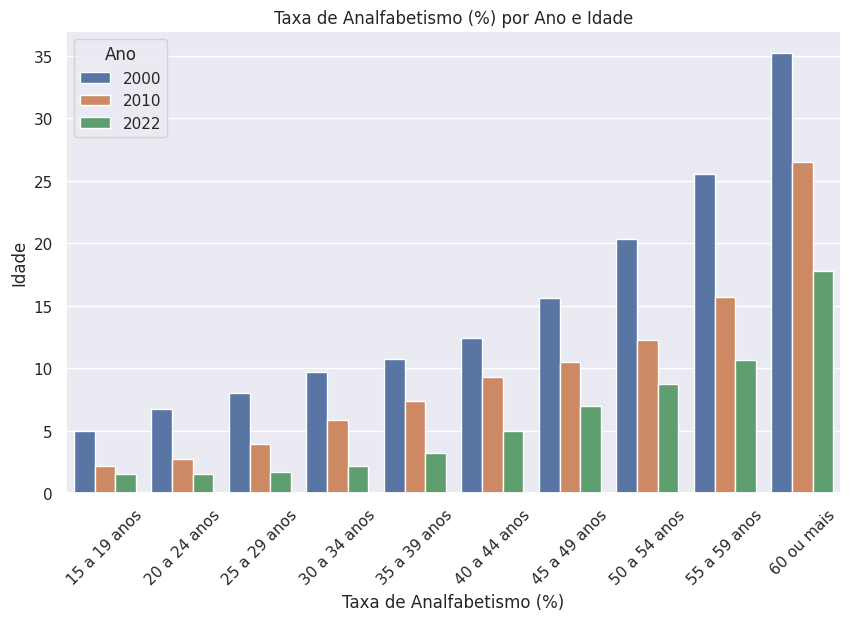

In [ ]:
#Grafico comparativo por idade
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.barplot(data=cg1br, x='Idade', y='Taxa de Analfabetismo (%)',hue='Ano')
plt.title('Taxa de Analfabetismo (%) por Ano e Idade')
plt.xlabel('Taxa de Analfabetismo (%)')
plt.ylabel('Idade')
plt.show()

In [ ]:
merge_censo = pd.merge(df_analfab_00, df_analfab_10, on='Unidade da Federação')
merge_censo = pd.merge(merge_censo, df_analfab_22, on='Unidade da Federação')

merge_censo['Variação 10_22'] = merge_censo['Taxa de Analfabetismo (%)'] - merge_censo['Taxa de Analfabetismo (%)_y']
merge_censo['Variação 00_10'] = merge_censo['Taxa de Analfabetismo (%)_y'] - merge_censo['Taxa de Analfabetismo (%)_x']
merge_censo['Variação 00_22'] = merge_censo['Taxa de Analfabetismo (%)'] - merge_censo['Taxa de Analfabetismo (%)_x']
merge_censo

NameError: name 'df_analfab_00' is not defined

In [ ]:
concat_censo = pd.concat([df_analfab_00, df_analfab_10, df_analfab_22])
concat_censo = concat_censo.sort_values(['Taxa de Analfabetismo (%)'], ascending=False)
concat_censo
pi = concat_censo[concat_censo['Unidade da Federação'] == 'Piauí']
rs = concat_censo[concat_censo['Unidade da Federação'] == 'Rio Grande do Sul']
concat_rs_pi = pd.concat([pi,rs])
concat_rs_pi

In [ ]:
plt.figure(figsize=(30,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
#sns.lineplot(data=concat_censo, x='Ano', y='Taxa de Analfabetismo (%)',marker='.', hue='Unidade da Federação')
sns.barplot(data=concat_censo, x='Unidade da Federação', y='Taxa de Analfabetismo (%)',hue="Ano")
plt.title('Taxa de Analfabetismo por Ano e Estado')
plt.xlabel('UF')
plt.ylabel('Taxa de Analfabetismo (%)')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=concat_rs_pi, x='Ano', y='Taxa de Analfabetismo (%)',marker='.', hue='Unidade da Federação')
#sns.barplot(data=concat_rs_pi, x='Unidade da Federação', y='Taxa de Analfabetismo (%)',hue="Ano")
plt.title('Taxa de Analfabetismo por Ano e Estado')
plt.xlabel('UF')
plt.ylabel('Taxa de Analfabetismo (%)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supondo que você já tenha os dataframes censo_22, censo_10 e censo_00 filtrados para o Piauí
# Exemplo de dados fictícios
age_groups = ['15 a 19', '20 a 24', '25 a 29', '30 a 39', '40 a 49', '50 a 59', '60 ou mais']
illiteracy_rates_00 = [10, 15, 20, 25, 30, 35, 40]  # Substitua pelos dados reais do censo_00_piaui
illiteracy_rates_10 = [5, 10, 15, 20, 25, 30, 35]   # Substitua pelos dados reais do censo_10_piaui
illiteracy_rates_22 = [0, 5, 10, 15, 20, 25, 30]    # Substitua pelos dados reais do censo_22_piaui

# Criar o gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.25
index = np.arange(len(age_groups))

bar1 = plt.bar(index, illiteracy_rates_00, bar_width, label='2000', color='b')
bar2 = plt.bar(index + bar_width, illiteracy_rates_10, bar_width, label='2010', color='orange')
bar3 = plt.bar(index + 2*bar_width, illiteracy_rates_22, bar_width, label='2022', color='yellow')

plt.xlabel('Grupos de idade')
plt.ylabel('Taxa de analfabetismo (%)')
plt.title('Taxa de analfabetismo das pessoas de 15 anos ou mais de idade segundo os grupos de idade - Piauí - 2000/2010/2022 (%)')
plt.xticks(index + bar_width, age_groups)
plt.legend()

plt.tight_layout()
plt.show()
